#%% Packages

In [10]:
import librosa
print(librosa.__version__)
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import os
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from scipy.fftpack import dct  # Import DCT from scipy
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.utils import shuffle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import lasso_path
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

0.10.2.post1


In [11]:
# Directories
wav_directory = r'C:\Users\chris\Desktop\thesis\sound_files\sound_files'
destination_directory = r'‪C:/Users/chris/Desktop/thesis/extracted_files'
csv_file = r'C:\Users\chris\Desktop\thesis\all_data_updated.csv'
sound_files_directory = r'C:\Users\chris\Desktop\thesis\sound_files\sound_files'

# cleaning hidden characters
wav_directory = wav_directory.replace('\u202a', '').strip()
destination_directory = destination_directory.replace('\u202a', '').strip()
csv_file = csv_file.replace('\u202a', '').strip()

df = pd.read_csv(csv_file)

In [12]:
# check if data fram is empty
if df.empty:
    raise ValueError("The CSV file is empty or could not be read properly.")

#change files names to match csv
df['file name'] = df['file name'].str[:-4] + '__segment' + df['target'].astype(str) + '.wav'

csv_file_names = set(df['file name'])

# destination directory 
os.makedirs(destination_directory, exist_ok=True)

# Counter 
files_copied = 0

In [13]:
# Loop through  .wav files
for wav_file in os.listdir(wav_directory):
    # Check if the file is a .wav file
    if wav_file.endswith('.wav'):
        #Check if this matches entry in CSV
        if wav_file in csv_file_names:
            source_path = os.path.join(wav_directory, wav_file)
            destination_path = os.path.join(destination_directory, wav_file)
            shutil.copy(source_path, destination_path)
            files_copied += 1
            print(f'Copied: {wav_file}')

print(f'Total files copied: {files_copied}')

Copied: 2022-06-05--17-41-01_2__segment5.wav
Copied: 2022-06-05--18-40-08_2__segment5.wav
Copied: 2022-06-05--19-39-14_2__segment5.wav
Copied: 2022-06-05--20-38-25_2__segment5.wav
Copied: 2022-06-05--21-37-36_2__segment5.wav
Copied: 2022-06-05--22-36-48_2__segment5.wav
Copied: 2022-06-05--23-36-04_2__segment5.wav
Copied: 2022-06-06--00-35-12_2__segment5.wav
Copied: 2022-06-06--01-34-26_2__segment5.wav
Copied: 2022-06-06--02-33-38_2__segment5.wav
Copied: 2022-06-06--03-32-49_2__segment5.wav
Copied: 2022-06-06--04-32-02_2__segment5.wav
Copied: 2022-06-06--05-31-11_2__segment5.wav
Copied: 2022-06-06--06-30-21_2__segment5.wav
Copied: 2022-06-06--07-29-46_2__segment5.wav
Copied: 2022-06-06--08-29-16_2__segment5.wav
Copied: 2022-06-06--09-28-32_2__segment5.wav
Copied: 2022-06-06--10-27-52_2__segment5.wav
Copied: 2022-06-06--11-27-09_2__segment5.wav
Copied: 2022-06-06--12-26-27_2__segment5.wav
Copied: 2022-06-06--13-25-30_2__segment5.wav
Copied: 2022-06-06--14-24-42_2__segment5.wav
Copied: 20

In [14]:
# Confirm number of files copied
expected_files = len(csv_file_names)
if files_copied == expected_files:
    print("All matching files have been successfully copied.")
else:
    print(f"Warning: Expected {expected_files} files but only copied {files_copied}.")
    
    copied_files = set(os.listdir(destination_directory))

In [15]:
# Filter the DataFrame to include only rows where the file name matches the copied files
filtered_df = df[df['file name'].isin(copied_files)]

new_df=r'C:\Users\chris\Desktop\thesis\new_df.csv'

#save this
filtered_df.to_csv(new_df, index=False)

print(f'Filtered DataFrame saved to {new_df}')

Filtered DataFrame saved to C:\Users\chris\Desktop\thesis\new_df.csv


In [16]:

#Load dataset
new_df = pd.read_csv(r'C:\Users\chris\Desktop\thesis\new_df.csv')
full_df = new_df

#new column with the determined queen status
def determine_queen_status(row):
    if row['queen presence'] == 1 and row['queen acceptance'] == 0:
        return 'Queen Present'
    elif row['queen presence'] == 1 and row['queen acceptance'] == 1:
        return 'Queen Being Introduced (Bad)'
    elif row['queen presence'] == 1 and row['queen acceptance'] == 2:
        return 'Queen Present'
    elif row['queen presence'] == 0 and row['queen acceptance'] == 0:
        return 'No Queen'
    else:
        return 'Unknown'

#apply function 
full_df['queen state'] = full_df.apply(determine_queen_status, axis=1)

# new 'queen presence' variable based on the 'queen_status'
# Update the new_queen_presence column to set both 'Queen Being Introduced (Bad)' and 'No Queen' to 0
full_df['queen status'] = full_df['queen state'].apply(lambda status: 0 if status in ['Queen Being Introduced (Bad)', 'No Queen'] else 1)


# Selecting columns and include the new queen presence variable
selected_columns = [
    'date', 'device', 'hive number', 'hive temp', 'hive humidity', 'hive pressure', 
    'file name', 'queen presence', 'queen acceptance', 'queen state', 'queen status'
]
new_dataset = full_df[selected_columns]

print(new_dataset.head(100))


                   date  device  ...    queen state  queen status
0   2022-06-08 14:52:28       1  ...  Queen Present             1
1   2022-06-08 15:51:41       1  ...  Queen Present             1
2   2022-06-08 17:21:53       1  ...       No Queen             0
3   2022-06-08 18:20:59       1  ...       No Queen             0
4   2022-06-08 19:20:04       1  ...       No Queen             0
..                  ...     ...  ...            ...           ...
95  2022-06-14 16:50:02       1  ...  Queen Present             1
96  2022-06-14 17:49:06       1  ...  Queen Present             1
97  2022-06-05 17:41:01       2  ...  Queen Present             1
98  2022-06-05 18:40:08       2  ...  Queen Present             1
99  2022-06-05 19:39:14       2  ...  Queen Present             1

[100 rows x 11 columns]


In [17]:
print(new_dataset[['queen presence', 'queen state', 'queen status']].head(n=10))


   queen presence    queen state  queen status
0               1  Queen Present             1
1               1  Queen Present             1
2               0       No Queen             0
3               0       No Queen             0
4               0       No Queen             0
5               0       No Queen             0
6               0       No Queen             0
7               0       No Queen             0
8               0       No Queen             0
9               0       No Queen             0


In [18]:
#shape of dataset
num_rows, num_columns = new_dataset.shape
print(f"The new_dataset has {num_rows} rows and {num_columns} columns.")

#and summary
print("\nSummary of new_dataset:")
print(new_dataset.info())

The new_dataset has 1152 rows and 11 columns.

Summary of new_dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1152 non-null   object 
 1   device            1152 non-null   int64  
 2   hive number       1152 non-null   int64  
 3   hive temp         1152 non-null   float64
 4   hive humidity     1152 non-null   float64
 5   hive pressure     1152 non-null   float64
 6   file name         1152 non-null   object 
 7   queen presence    1152 non-null   int64  
 8   queen acceptance  1152 non-null   int64  
 9   queen state       1152 non-null   object 
 10  queen status      1152 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 99.1+ KB
None


In [19]:
#unique hives
unique_hives = new_dataset['hive number'].unique()

# Create a dictionary to hold DataFrames for each hive
hives_data = {}

#DataFrame for each hive
for hive in unique_hives:
    hive_data = new_dataset[new_dataset['hive number'] == hive]
    hive_name = f"hive{hive}"
    hives_data[hive_name] = hive_data

# Display these
for hive_name, hive_data in hives_data.items():
    print(f"{hive_name} DataFrame:")
    print(hive_data.head())  #
    print("\n")


for hive_name, hive_data in hives_data.items():
    print(f"{hive_name} DataFrame:")
    print(hive_data.head())  
    print("\n")



hive5 DataFrame:
                  date  device  ...    queen state  queen status
0  2022-06-08 14:52:28       1  ...  Queen Present             1
1  2022-06-08 15:51:41       1  ...  Queen Present             1
2  2022-06-08 17:21:53       1  ...       No Queen             0
3  2022-06-08 18:20:59       1  ...       No Queen             0
4  2022-06-08 19:20:04       1  ...       No Queen             0

[5 rows x 11 columns]


hive3 DataFrame:
                    date  device  ...    queen state  queen status
97   2022-06-05 17:41:01       2  ...  Queen Present             1
98   2022-06-05 18:40:08       2  ...  Queen Present             1
99   2022-06-05 19:39:14       2  ...  Queen Present             1
100  2022-06-05 20:38:25       2  ...  Queen Present             1
101  2022-06-05 21:37:36       2  ...  Queen Present             1

[5 rows x 11 columns]


hive4 DataFrame:
                    date  device  ...    queen state  queen status
285  2022-06-24 10:03:35       1  ...  Q

In [20]:
#dictionary to hold DataFrames for each hive's queen status 
queen_status_tables = {}

#Table for each hive 
for hive_name, hive_data in hives_data.items():
    
    queen_status_count = hive_data['queen status'].value_counts().reset_index()
    queen_status_count.columns = ['queen status', 'Count']
    
    queen_status_tables[hive_name] = queen_status_count

    print(f"{hive_name} Queen Status Table:")
    print(queen_status_count)
    print("\n")


hive5 Queen Status Table:
   queen status  Count
0             0     70
1             1     27


hive3 Queen Status Table:
   queen status  Count
0             0    123
1             1     65


hive4 Queen Status Table:
   queen status  Count
0             1    324
1             0     99


hive1 Queen Status Table:
   queen status  Count
0             1    319
1             0    125




In [21]:
# Define training and validation data based on hive numbers
training_hive = 4
validation_hive = 1

#training and validation datasets
train_data = hives_data[f"hive{training_hive}"]
validation_data = hives_data[f"hive{validation_hive}"]

print(f"Training data contains {train_data.shape[0]} rows.")
print(f"Validation data contains {validation_data.shape[0]} rows.")

print("Training Data (Hive 1):")
print(train_data.head(), "\n")

print("Validation Data (Hive 4):")
print(validation_data.head())

# Frequency tables for the training dataset (Hive 4)
print("Frequency Table for 'queen status' in Training Data (Hive 4):")
print(train_data['queen status'].value_counts(), "\n")

print("Frequency Table for 'queen state' in Training Data (Hive 4):")
print(train_data['queen state'].value_counts(), "\n")

# Frequency tables for the validation dataset (Hive 1)
print("Frequency Table for 'queen status' in Validation Data (Hive 1):")
print(validation_data['queen status'].value_counts(), "\n")

print("Frequency Table for 'queen state' in Validation Data (Hive 1):")
print(validation_data['queen state'].value_counts(), "\n")

Training data contains 423 rows.
Validation data contains 444 rows.
Training Data (Hive 1):
                    date  device  ...    queen state  queen status
285  2022-06-24 10:03:35       1  ...  Queen Present             1
286  2022-06-24 11:03:30       1  ...  Queen Present             1
287  2022-06-24 12:02:42       1  ...  Queen Present             1
288  2022-06-24 13:01:08       1  ...  Queen Present             1
289  2022-06-24 14:00:07       1  ...  Queen Present             1

[5 rows x 11 columns] 

Validation Data (Hive 4):
                    date  device  ...    queen state  queen status
708  2022-06-14 21:15:24       2  ...  Queen Present             1
709   2022-06-15 1:26:10       2  ...  Queen Present             1
710   2022-06-15 2:25:24       2  ...  Queen Present             1
711   2022-06-15 5:32:54       2  ...  Queen Present             1
712   2022-06-15 6:32:29       2  ...  Queen Present             1

[5 rows x 11 columns]
Frequency Table for 'queen sta

In [22]:
#checking if audio files exist
def check_audio_files_exist(data, dataset_name):
    missing_files = 0
    for audio_file in data['file name']:
        audio_path = os.path.join(sound_files_directory, audio_file)
        
        if os.path.exists(audio_path):
            print(f"File exists: {audio_path}")
        else:
            print(f"File {audio_file} not found in directory: {sound_files_directory}, skipping...")
            missing_files += 1
    
    print(f"\n{dataset_name}: {missing_files} missing files out of {len(data)} total files.")

# for  validation set
check_audio_files_exist(validation_data, 'Validation Set')

# for the training set
check_audio_files_exist(train_data, 'Training Set')

File exists: C:\Users\chris\Desktop\thesis\sound_files\sound_files\2022-06-14--21-15-24_2__segment5.wav
File exists: C:\Users\chris\Desktop\thesis\sound_files\sound_files\2022-06-15--01-26-10_2__segment5.wav
File exists: C:\Users\chris\Desktop\thesis\sound_files\sound_files\2022-06-15--02-25-24_2__segment5.wav
File exists: C:\Users\chris\Desktop\thesis\sound_files\sound_files\2022-06-15--05-32-54_2__segment5.wav
File exists: C:\Users\chris\Desktop\thesis\sound_files\sound_files\2022-06-15--06-32-29_2__segment5.wav
File exists: C:\Users\chris\Desktop\thesis\sound_files\sound_files\2022-06-15--08-32-07_2__segment5.wav
File exists: C:\Users\chris\Desktop\thesis\sound_files\sound_files\2022-06-15--09-32-36_2__segment5.wav
File exists: C:\Users\chris\Desktop\thesis\sound_files\sound_files\2022-06-15--10-31-40_2__segment5.wav
File exists: C:\Users\chris\Desktop\thesis\sound_files\sound_files\2022-06-15--11-30-55_2__segment5.wav
File exists: C:\Users\chris\Desktop\thesis\sound_files\sound_fil

In [23]:
#MFCC function
#First for validation of hives
def extract_mfccs(file_path, frame_length_ms=25, n_mfcc=20, n_mels=40, fmin=50.0, alpha=0.95):
    """
    Extracts MFCCs from an audio file using a Hamming window.

    Parameters:
        file_path (str): Path to the audio file.
        frame_length_ms (int): Frame length in milliseconds (default is 25ms).
        n_mfcc (int): Number of MFCCs to extract (default is 14).
        n_mels (int): Number of Mel bands (default is 40).
        fmin (float): Minimum frequency for the Mel filter bank (default is 50 Hz).
        alpha (float): Pre-emphasis filter coefficient (default is 0.95).

    Returns:
        np.ndarray: The MFCCs of the audio file.
    """
    try:
        y, sr = librosa.load(file_path, sr=None)

        n_fft = int(0.001 * frame_length_ms * sr)
        hop_length = n_fft // 2  # 50% overlap

        y_preemphasized = np.append(y[0], y[1:] - alpha * y[:-1])

        mfccs = librosa.feature.mfcc(
            y=y_preemphasized, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length,
            n_mels=n_mels, fmin=fmin, fmax=sr / 2, window='hamming'
        )

        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e:
        print(f"Error encountered while parsing file: {file_path}, error: {e}")
        return None

validation_features = {}

sound_files_directory = r'C:\Users\chris\Desktop\thesis\sound_files\sound_files'

# Iterate over files in the validation set
for audio_file in validation_data['file name']:
    audio_path = os.path.join(sound_files_directory, audio_file)
    
    if os.path.exists(audio_path):
        # Extract features
        features = extract_mfccs(audio_path)
        if features is not None:
            validation_features[audio_file] = features
        else:
            print(f"Failed to extract features for {audio_file}")
    else:
        print(f"File {audio_file} not found, skipping...")

validation_features_df = pd.DataFrame.from_dict(validation_features, orient='index')

# Saving
validation_features_df.to_csv(r'C:\Users\chris\Desktop\thesis\validation_features_extracted_hive_4.csv')
print("MFCC features for validation set saved.")

MFCC features for validation set saved.


In [24]:
import librosa
file_path = r'C:\Users\chris\Desktop\thesis\sound_files\sound_files\2022-06-08--18-20-59_1__segment0.wav' # Replace with your file path
y, sr = librosa.load(file_path, sr=None)  # Load with original sampling rate

print(f"Sampling rate of the audio file: {sr} Hz")

Sampling rate of the audio file: 22050 Hz


In [25]:
#MFCC for training hive
training_features = {}

for audio_file in train_data['file name']:
    audio_path = os.path.join(sound_files_directory, audio_file)
    
    if os.path.exists(audio_path):
        # Extract features
        features = extract_mfccs(audio_path)
        if features is not None:
            training_features[audio_file] = features
        else:
            print(f"Failed to extract features for {audio_file}")
    else:
        print(f"File {audio_file} not found, skipping...")

training_features_df = pd.DataFrame.from_dict(training_features, orient='index')

print(training_features_df.head())

# sauing
training_features_df.to_csv(r'C:\Users\chris\Desktop\thesis\training_features_extracted_hive_1.csv')
print("MFCC features for training set saved.")

                                              0          1   ...        18        19
2022-06-24--10-03-35_1__segment0.wav -272.670288  43.828251  ...  7.385158 -1.035185
2022-06-24--11-03-30_1__segment0.wav -250.750778  57.378227  ...  5.376815 -1.968844
2022-06-24--12-02-42_1__segment0.wav -252.060272  58.769135  ...  6.303921 -2.245239
2022-06-24--13-01-08_1__segment0.wav -241.995331  61.861374  ...  7.137311 -1.665325
2022-06-24--14-00-07_1__segment0.wav -247.006500  45.352955  ...  7.213299 -1.462362

[5 rows x 20 columns]
MFCC features for training set saved.


In [26]:
#MFCC for full dataset
data_features = {}

for audio_file in new_dataset['file name']:
    audio_path = os.path.join(sound_files_directory, audio_file)
    
    if os.path.exists(audio_path):
        # Extract features
        features = extract_mfccs(audio_path)
        if features is not None:
            data_features[audio_file] = features
        else:
            print(f"Failed to extract features for {audio_file}")
    else:
        print(f"File {audio_file} not found, skipping...")

data_features_df = pd.DataFrame.from_dict(data_features, orient='index')

print(data_features_df.head())

#saving
data_features_df.to_csv(r'C:\Users\chris\Desktop\thesis\training_features_extracted_data.csv')
print("MFCC features for full data set saved.")

                                              0          1   ...        18        19
2022-06-08--14-52-28_1__segment0.wav -263.035065  58.628910  ...  5.598070 -5.731565
2022-06-08--15-51-41_1__segment0.wav -261.580231  55.994701  ...  5.045178 -5.280856
2022-06-08--17-21-53_1__segment1.wav -216.657974  51.652611  ...  5.955168 -6.275753
2022-06-08--18-20-59_1__segment1.wav -264.630615  51.164391  ...  5.372751 -7.085421
2022-06-08--19-20-04_1__segment1.wav -261.208710  54.924950  ...  5.246150 -7.045969

[5 rows x 20 columns]
MFCC features for full data set saved.


In [27]:
#%% PRE-PROCESSING STEPS DONE###########
########################################
########################################

In [31]:
#%% TRAINING AND VALIDATION SET##################

In [32]:
#%% KNN #############################

In [33]:
data_features_df_knn=data_features_df

data_features_df_knn['queen state'] = new_dataset['queen state'].values

print("data Features with Queen state:")
print(data_features_df_knn.head(50))

data Features with Queen state:
                                               0  ...                   queen state
2022-06-08--14-52-28_1__segment0.wav -263.035065  ...                 Queen Present
2022-06-08--15-51-41_1__segment0.wav -261.580231  ...                 Queen Present
2022-06-08--17-21-53_1__segment1.wav -216.657974  ...                      No Queen
2022-06-08--18-20-59_1__segment1.wav -264.630615  ...                      No Queen
2022-06-08--19-20-04_1__segment1.wav -261.208710  ...                      No Queen
2022-06-08--20-19-13_1__segment1.wav -264.189453  ...                      No Queen
2022-06-08--21-18-22_1__segment1.wav -278.704193  ...                      No Queen
2022-06-08--22-17-32_1__segment1.wav -277.264008  ...                      No Queen
2022-06-08--23-16-44_1__segment1.wav -278.860901  ...                      No Queen
2022-06-09--00-15-56_1__segment1.wav -274.780396  ...                      No Queen
2022-06-09--01-15-08_1__segment1.wav -277.03

In [34]:
data_features_df_knn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,queen state
2022-06-08--14-52-28_1__segment0.wav,-263.035065,58.628910,-16.991993,32.329185,-24.185463,25.611643,-15.064124,19.812746,-10.268037,9.707477,-5.411926,0.494186,-3.021507,-2.881160,4.704834,-1.501259,6.923781,-4.545998,5.598070,-5.731565,Queen Present
2022-06-08--15-51-41_1__segment0.wav,-261.580231,55.994701,-12.741114,31.694599,-20.891666,24.894299,-13.106910,18.642790,-8.598333,9.887801,-3.583866,0.732838,-2.318738,-3.037021,4.672187,-1.758790,6.787564,-3.729923,5.045178,-5.280856,Queen Present
2022-06-08--17-21-53_1__segment1.wav,-216.657974,51.652611,-17.795229,32.908993,-25.062057,30.687778,-17.406513,22.346050,-15.380752,7.986450,-7.795173,1.548201,-2.903972,-2.639918,-0.072842,-5.060390,6.161526,-5.703199,5.955168,-6.275753,No Queen
2022-06-08--18-20-59_1__segment1.wav,-264.630615,51.164391,-23.973898,37.168690,-26.075417,28.769350,-19.073322,20.504223,-14.414293,10.344848,-7.201215,0.975064,-3.856436,-2.574268,3.950340,-2.167076,6.161875,-5.939039,5.372751,-7.085421,No Queen
2022-06-08--19-20-04_1__segment1.wav,-261.208710,54.924950,-24.230566,36.456913,-25.606565,27.552773,-19.317696,19.910105,-14.539541,11.235567,-6.628173,0.932554,-3.762752,-2.602258,3.984604,-2.278128,6.333273,-5.757142,5.246150,-7.045969,No Queen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15--03-08-59_2__segment5.wav,-266.452667,59.512562,-18.314579,32.329716,-23.733500,23.582426,-18.101269,19.535986,-9.092024,6.942803,-3.808362,-1.465026,1.590005,-4.097225,4.678261,-7.216600,3.418204,-6.384998,2.191558,-5.632465,Queen Present
2022-07-15--04-07-19_2__segment5.wav,-268.709717,56.986660,-20.281910,33.788887,-22.172600,23.196821,-19.057232,19.403713,-9.926043,6.305874,-5.373696,-1.661443,0.516942,-4.353006,5.039300,-6.504533,3.935305,-6.706529,2.308628,-6.360013,Queen Present
2022-07-15--05-06-30_2__segment5.wav,-266.045776,59.927544,-19.579096,31.674421,-22.606224,24.998367,-17.091948,19.356821,-8.969187,6.713801,-3.500779,-0.429280,1.660809,-3.278169,4.940281,-6.488985,3.829213,-7.035145,1.654590,-6.038208,Queen Present
2022-07-15--06-05-42_2__segment5.wav,-266.996674,59.683315,-20.083237,33.043499,-23.199900,23.984276,-18.931591,16.724222,-10.027184,7.628798,-3.499448,-1.429840,1.038049,-4.151135,4.237253,-6.676555,3.827826,-7.156749,1.532458,-6.435913,Queen Present


Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\chris\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [       nan 0.89247356 0.88703878 0.89137485        nan 0.89140423
 0.88055229 0.88164512        nan 0.88707403 0.88383079 0.88709166
        nan 0.87408343 0.86323149 0.86864865 0.8870564  0.89247356
 0.88703878 0.89137485 0.89140423 0.89140423 0.88055229 0.88164512
 0.881651   0.88707403 0.88383079 0.88709166 0.86648649 0.87408343
 0.86323149 0.86864865]
  warnings.warn(


Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy: 0.9090909090909091
Classification Report:
                              precision    recall  f1-score   support

                    No Queen       0.96      0.84      0.90        32
               Queen Present       0.83      0.83      0.83        52
Queen Being Introduced (Bad)       0.93      0.95      0.94       147

                    accuracy                           0.91       231
                   macro avg       0.91      0.87      0.89       231
                weighted avg       0.91      0.91      0.91       231



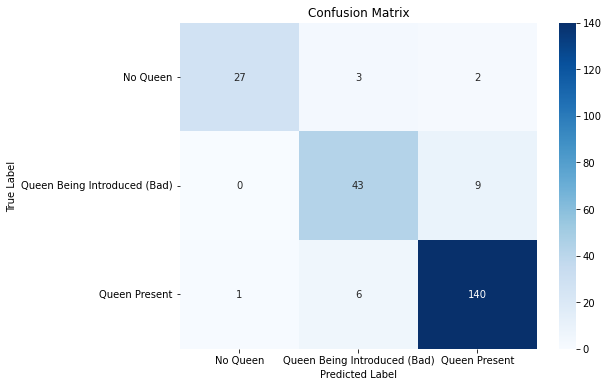

In [35]:

X = data_features_df_knn.iloc[:, :-1].values  # Extract all columns except the last one as features
y = data_features_df_knn.iloc[:, -1].values   # Extract the last column ('queen_status') as the target

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],        # Number of neighbors to try
    'weights': ['uniform', 'distance'], # Weighting function
    'p': [1, 2],                        # Manhattan distance (p=1) and Euclidean distance (p=2)
    'algorithm': ['auto', 'kd_tree'],   # Algorithm to use
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Queen', 'Queen Present', 'Queen Being Introduced (Bad)']))

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Queen', 'Queen Being Introduced (Bad)', 'Queen Present'],
            yticklabels=['No Queen', 'Queen Being Introduced (Bad)', 'Queen Present'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
###############LASSO LOGISTICS######################

In [60]:

# Add the 'queen_status' column from train_data and validation_data to the feature DataFrames
data_features_df['queen status'] = new_dataset['queen status'].values

# Print the resulting DataFrames to verify the changes
print("data Features with Queen status:")
print(data_features_df.head(50))

data Features with Queen status:
                                               0  ...  queen status
2022-06-08--14-52-28_1__segment0.wav -263.035065  ...             1
2022-06-08--15-51-41_1__segment0.wav -261.580231  ...             1
2022-06-08--17-21-53_1__segment1.wav -216.657974  ...             0
2022-06-08--18-20-59_1__segment1.wav -264.630615  ...             0
2022-06-08--19-20-04_1__segment1.wav -261.208710  ...             0
2022-06-08--20-19-13_1__segment1.wav -264.189453  ...             0
2022-06-08--21-18-22_1__segment1.wav -278.704193  ...             0
2022-06-08--22-17-32_1__segment1.wav -277.264008  ...             0
2022-06-08--23-16-44_1__segment1.wav -278.860901  ...             0
2022-06-09--00-15-56_1__segment1.wav -274.780396  ...             0
2022-06-09--01-15-08_1__segment1.wav -277.031281  ...             0
2022-06-09--02-14-24_1__segment1.wav -275.474579  ...             0
2022-06-09--03-13-35_1__segment1.wav -275.240173  ...             0
2022-06-09--04-

In [84]:
data_features_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,queen state,queen status
2022-06-08--14-52-28_1__segment0.wav,-263.035065,58.628910,-16.991993,32.329185,-24.185463,25.611643,-15.064124,19.812746,-10.268037,9.707477,-5.411926,0.494186,-3.021507,-2.881160,4.704834,-1.501259,6.923781,-4.545998,5.598070,-5.731565,Queen Present,1
2022-06-08--15-51-41_1__segment0.wav,-261.580231,55.994701,-12.741114,31.694599,-20.891666,24.894299,-13.106910,18.642790,-8.598333,9.887801,-3.583866,0.732838,-2.318738,-3.037021,4.672187,-1.758790,6.787564,-3.729923,5.045178,-5.280856,Queen Present,1
2022-06-08--17-21-53_1__segment1.wav,-216.657974,51.652611,-17.795229,32.908993,-25.062057,30.687778,-17.406513,22.346050,-15.380752,7.986450,-7.795173,1.548201,-2.903972,-2.639918,-0.072842,-5.060390,6.161526,-5.703199,5.955168,-6.275753,No Queen,0
2022-06-08--18-20-59_1__segment1.wav,-264.630615,51.164391,-23.973898,37.168690,-26.075417,28.769350,-19.073322,20.504223,-14.414293,10.344848,-7.201215,0.975064,-3.856436,-2.574268,3.950340,-2.167076,6.161875,-5.939039,5.372751,-7.085421,No Queen,0
2022-06-08--19-20-04_1__segment1.wav,-261.208710,54.924950,-24.230566,36.456913,-25.606565,27.552773,-19.317696,19.910105,-14.539541,11.235567,-6.628173,0.932554,-3.762752,-2.602258,3.984604,-2.278128,6.333273,-5.757142,5.246150,-7.045969,No Queen,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15--03-08-59_2__segment5.wav,-266.452667,59.512562,-18.314579,32.329716,-23.733500,23.582426,-18.101269,19.535986,-9.092024,6.942803,-3.808362,-1.465026,1.590005,-4.097225,4.678261,-7.216600,3.418204,-6.384998,2.191558,-5.632465,Queen Present,1
2022-07-15--04-07-19_2__segment5.wav,-268.709717,56.986660,-20.281910,33.788887,-22.172600,23.196821,-19.057232,19.403713,-9.926043,6.305874,-5.373696,-1.661443,0.516942,-4.353006,5.039300,-6.504533,3.935305,-6.706529,2.308628,-6.360013,Queen Present,1
2022-07-15--05-06-30_2__segment5.wav,-266.045776,59.927544,-19.579096,31.674421,-22.606224,24.998367,-17.091948,19.356821,-8.969187,6.713801,-3.500779,-0.429280,1.660809,-3.278169,4.940281,-6.488985,3.829213,-7.035145,1.654590,-6.038208,Queen Present,1
2022-07-15--06-05-42_2__segment5.wav,-266.996674,59.683315,-20.083237,33.043499,-23.199900,23.984276,-18.931591,16.724222,-10.027184,7.628798,-3.499448,-1.429840,1.038049,-4.151135,4.237253,-6.676555,3.827826,-7.156749,1.532458,-6.435913,Queen Present,1


In [62]:
X = data_features_df.iloc[:, :-2].values  
y = data_features_df.iloc[:, -1].values   # Extract the last column ('queen_status') as the target
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 


Best Hyperparameters: {'C': 5.963623316594643}
Best Cross-Validation Score: 0.7350352526439483

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.42      0.51        89
           1       0.70      0.87      0.78       142

    accuracy                           0.69       231
   macro avg       0.68      0.64      0.64       231
weighted avg       0.69      0.69      0.67       231



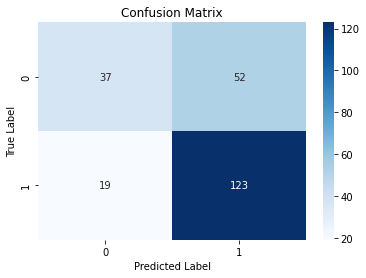


Logistic Lasso Model Coefficients:
Feature 1: -0.0085
Feature 2: 0.0011
Feature 3: -0.1329
Feature 4: 0.1212
Feature 5: -0.1882
Feature 6: -0.3830
Feature 7: 0.1155
Feature 8: 0.1260
Feature 9: 0.1433
Feature 10: -0.0684
Feature 11: -0.0063
Feature 12: -0.0092
Feature 13: 0.1419
Feature 14: -0.0330
Feature 15: 0.0520
Feature 16: 0.1612
Feature 17: -0.0699
Feature 18: 0.1388
Feature 19: -0.3049
Feature 20: -0.1877


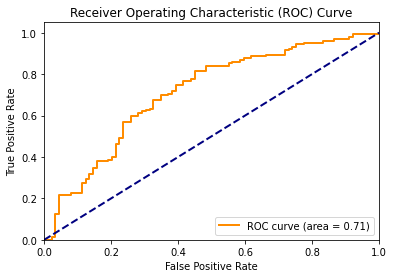


AUC Score: 0.71


In [57]:

logistic_lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)


param_dist = {
    'C': np.logspace(-2, 2, 50)  
}

from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(logistic_lasso, param_distributions=param_dist, 
                                   n_iter=50,  # Number of random samples
                                   scoring='accuracy',  # Use accuracy for classification
                                   cv=5,  # 5-fold cross-validation on training data
                                   random_state=42)

random_search.fit(X_train, y_train)

print(f"\nBest Hyperparameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_}")

best_logistic_lasso_model = random_search.best_estimator_
y_pred = best_logistic_lasso_model.predict(X_test)

#classification report
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['0', '1']))

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Logistic Lasso coefficients
print("\nLogistic Lasso Model Coefficients:")
for idx, coef in enumerate(best_logistic_lasso_model.coef_[0]):
    print(f"Feature {idx + 1}: {coef:.4f}")

#ROC curve and AUC score
y_prob = best_logistic_lasso_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class (Present)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # False Positive Rate, True Positive Rate
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC Score: {roc_auc:.2f}")

Fitting 5 folds for each of 120 candidates, totalling 600 fits

Best Hyperparameters: {'C': 11.288378916846883, 'max_iter': 1000, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.7851820728291317

Classification Report:
              precision    recall  f1-score   support

  Absent (0)       0.31      0.04      0.07       125
 Present (1)       0.72      0.97      0.82       319

    accuracy                           0.70       444
   macro avg       0.52      0.50      0.45       444
weighted avg       0.61      0.70      0.61       444



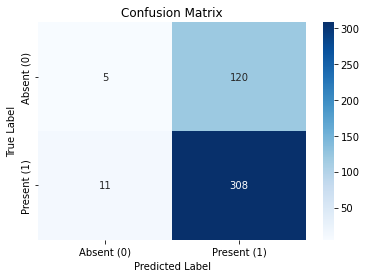


Logistic Lasso Model Coefficients:
Feature 1: 0.0711
Feature 2: 0.1370
Feature 3: 0.1101
Feature 4: -0.1347
Feature 5: -0.5811
Feature 6: -0.0671
Feature 7: -0.5570
Feature 8: -0.7195
Feature 9: 2.4645
Feature 10: -0.6363
Feature 11: -1.8460
Feature 12: 0.4998
Feature 13: 1.4474
Feature 14: -2.8655
Feature 15: 2.1573
Feature 16: -0.4531
Feature 17: 0.1518
Feature 18: -1.9081
Feature 19: 0.5648
Feature 20: 1.0199


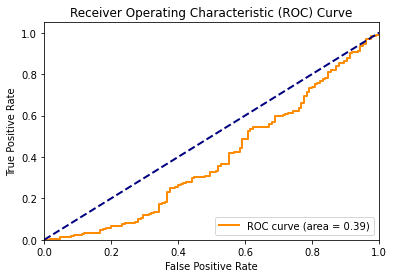


AUC Score: 0.39


In [86]:
logistic_lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=5000, random_state=42)

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength, smaller values = stronger regularization
    'solver': ['liblinear', 'saga'],  # Different solvers that support 'l1' penalty
    'max_iter': [1000, 2000, 5000]    # Number of iterations to allow convergence
}

# Step 3: Setup GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logistic_lasso, param_grid=param_grid, 
                           scoring='accuracy',  # Use accuracy for classification
                           cv=5,  # 5-fold cross-validation on training data
                           n_jobs=-1,  # Use all available cores for parallel computation
                           verbose=1)

# Step 4: Fit the model with the grid search on training data
grid_search.fit(X_train, y_train)

# Step 5: Print the best hyperparameters and the best score
print(f"\nBest Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Step 6: Evaluate the best model on the test data
best_logistic_lasso_model = grid_search.best_estimator_
y_pred = best_logistic_lasso_model.predict(X_test)

# Step 7: Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Absent (0)', 'Present (1)']))

# Step 8: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Absent (0)', 'Present (1)'], yticklabels=['Absent (0)', 'Present (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Print the chosen Logistic Lasso coefficients
print("\nLogistic Lasso Model Coefficients:")
for idx, coef in enumerate(best_logistic_lasso_model.coef_[0]):
    print(f"Feature {idx + 1}: {coef:.4f}")

# Step 10: Calculate ROC curve and AUC score
y_prob = best_logistic_lasso_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class (Present)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # False Positive Rate, True Positive Rate
roc_auc = auc(fpr, tpr)

# Step 11: Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Step 12: Print AUC score
print(f"\nAUC Score: {roc_auc:.2f}")

In [ ]:
#################NORMAL LOGISTIC REgression #########################

In [64]:
data_features_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,queen state,queen status
2022-06-08--14-52-28_1__segment0.wav,-263.035065,58.628910,-16.991993,32.329185,-24.185463,25.611643,-15.064124,19.812746,-10.268037,9.707477,-5.411926,0.494186,-3.021507,-2.881160,4.704834,-1.501259,6.923781,-4.545998,5.598070,-5.731565,Queen Present,1
2022-06-08--15-51-41_1__segment0.wav,-261.580231,55.994701,-12.741114,31.694599,-20.891666,24.894299,-13.106910,18.642790,-8.598333,9.887801,-3.583866,0.732838,-2.318738,-3.037021,4.672187,-1.758790,6.787564,-3.729923,5.045178,-5.280856,Queen Present,1
2022-06-08--17-21-53_1__segment1.wav,-216.657974,51.652611,-17.795229,32.908993,-25.062057,30.687778,-17.406513,22.346050,-15.380752,7.986450,-7.795173,1.548201,-2.903972,-2.639918,-0.072842,-5.060390,6.161526,-5.703199,5.955168,-6.275753,No Queen,0
2022-06-08--18-20-59_1__segment1.wav,-264.630615,51.164391,-23.973898,37.168690,-26.075417,28.769350,-19.073322,20.504223,-14.414293,10.344848,-7.201215,0.975064,-3.856436,-2.574268,3.950340,-2.167076,6.161875,-5.939039,5.372751,-7.085421,No Queen,0
2022-06-08--19-20-04_1__segment1.wav,-261.208710,54.924950,-24.230566,36.456913,-25.606565,27.552773,-19.317696,19.910105,-14.539541,11.235567,-6.628173,0.932554,-3.762752,-2.602258,3.984604,-2.278128,6.333273,-5.757142,5.246150,-7.045969,No Queen,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15--03-08-59_2__segment5.wav,-266.452667,59.512562,-18.314579,32.329716,-23.733500,23.582426,-18.101269,19.535986,-9.092024,6.942803,-3.808362,-1.465026,1.590005,-4.097225,4.678261,-7.216600,3.418204,-6.384998,2.191558,-5.632465,Queen Present,1
2022-07-15--04-07-19_2__segment5.wav,-268.709717,56.986660,-20.281910,33.788887,-22.172600,23.196821,-19.057232,19.403713,-9.926043,6.305874,-5.373696,-1.661443,0.516942,-4.353006,5.039300,-6.504533,3.935305,-6.706529,2.308628,-6.360013,Queen Present,1
2022-07-15--05-06-30_2__segment5.wav,-266.045776,59.927544,-19.579096,31.674421,-22.606224,24.998367,-17.091948,19.356821,-8.969187,6.713801,-3.500779,-0.429280,1.660809,-3.278169,4.940281,-6.488985,3.829213,-7.035145,1.654590,-6.038208,Queen Present,1
2022-07-15--06-05-42_2__segment5.wav,-266.996674,59.683315,-20.083237,33.043499,-23.199900,23.984276,-18.931591,16.724222,-10.027184,7.628798,-3.499448,-1.429840,1.038049,-4.151135,4.237253,-6.676555,3.827826,-7.156749,1.532458,-6.435913,Queen Present,1


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


C:\Users\chris\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1800 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chris\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\chris\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solve

Best Parameters: {'C': 0.01, 'l1_ratio': 0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.64      0.39      0.49        89
           1       0.69      0.86      0.77       142

    accuracy                           0.68       231
   macro avg       0.66      0.63      0.63       231
weighted avg       0.67      0.68      0.66       231



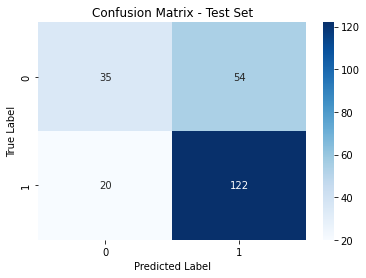

In [92]:
X = data_features_df.iloc[:, :-2].values  
y = data_features_df.iloc[:, -1].values   # Extract the last column ('queen_status') as the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_model = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalty
    'C': [0.01, 0.1, 1.0, 10, 100],  # Regularization strength (inverse of regularization)
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Solvers that support different penalties
    'max_iter': [100, 200, 500, 1000],  # Number of iterations
    'l1_ratio': [0, 0.5, 1],  # Only for elasticnet penalty
}

grid_search = GridSearchCV(log_reg_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

y_test_pred = best_model.predict(X_test_scaled)

print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()


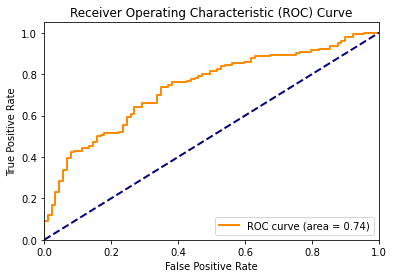

AUC Score: 0.74


In [94]:
# ROC curve and AUC score
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # False Positive Rate, True Positive Rate
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc:.2f}")

In [ ]:
################### SVM ###########################

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

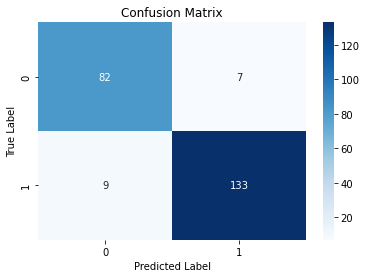


Test Set Mean Squared Error: 0.06926406926406926


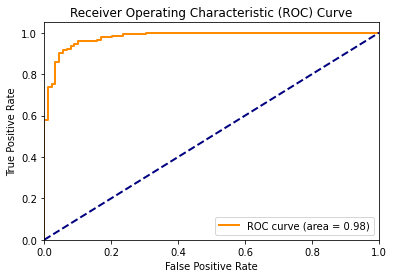


AUC Score: 0.98


In [59]:

X = data_features_df.iloc[:, :-2].values  # Extract first 14 columns as features (coefficients)
y = data_features_df.iloc[:, -1].values   # Extract the last column ('queen_status') as the target
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
svm_model = SVC(probability=True)
 
param_grid = {
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'gamma': ['scale', 0.1, 0.01, 0.001], # Kernel coefficient for 'rbf'
    'kernel': ['rbf', 'linear']           # Try both RBF and Linear kernels
}
 
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, scoring='accuracy')
 
grid_search.fit(X_train, y_train)
 
print(f"\nBest Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")
 
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)
 
# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['0', '1']))
 
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
 
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
 
#mes on test
mse = mean_squared_error(y_test, y_pred)
print(f"\nTest Set Mean Squared Error: {mse}")


#ROC curve and AUC score
y_prob = best_svm_model.predict_proba(X_test)[:, 1]  


fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # False Positive Rate, True Positive Rate
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC Score: {roc_auc:.2f}")

In [ ]:
############ CNN #####################

C:\Users\chris\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5436 - loss: 0.6786 - val_accuracy: 0.6147 - val_loss: 0.6868
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6495 - loss: 0.6543 - val_accuracy: 0.6147 - val_loss: 0.6712
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6414 - loss: 0.6532 - val_accuracy: 0.6147 - val_loss: 0.6665
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6289 - loss: 0.6604 - val_accuracy: 0.6147 - val_loss: 0.6666
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6478 - loss: 0.6501 - val_accuracy: 0.6147 - val_loss: 0.6682
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6367 - loss: 0.6552 - val_accuracy: 0.6147 - val_loss: 0.6702
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6460 - loss: 0.6499 - val_accuracy: 0.6147 - val_loss: 0.6679
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6587 - loss: 0.6425 - val_accuracy: 0.6147 - val_loss: 0.

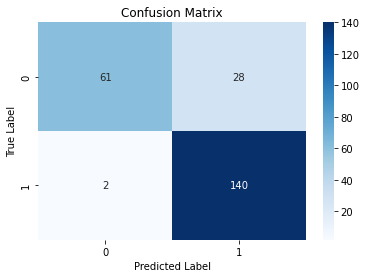

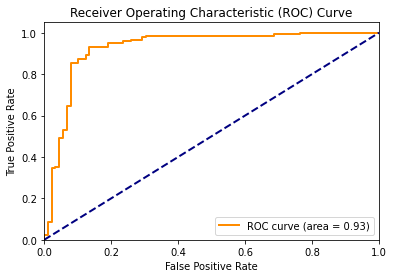

In [67]:

X = data_features_df.iloc[:, :-2].values  # 20 features
y = data_features_df.iloc[:, -1].values   # Binary target 'queen_status'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN input (3D input with 1 channel)
# Shape will be (samples, 20 features, 1 channel, 1)
X_train_reshaped = X_train_scaled.reshape(-1, 20, 1, 1)  
X_test_reshaped = X_test_scaled.reshape(-1, 20, 1, 1)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# CNN model with specified parameters
def create_cnn():
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size=(8, 8), activation='sigmoid', input_shape=(20, 1, 1), padding='same'))
    
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
    
    model.add(Flatten())
    
    model.add(Dense(256, activation='sigmoid'))
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(64, activation='sigmoid'))
    
    model.add(Dense(1, activation='sigmoid'))  n
    
    model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = create_cnn()

# Train 
history = model.fit(X_train_reshaped, y_train_encoded, epochs=500, batch_size=128, validation_data=(X_test_reshaped, y_test_encoded))

# evaluate 
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print(f"Test Accuracy: {test_accuracy}")

#redictions
y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba >= 0.5).astype(int).flatten()

#classification metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test_encoded, y_pred))
print(f"Confusion Matrix:\n{confusion_matrix(y_test_encoded, y_pred)}")
print(f"AUC Score: {roc_auc_score(y_test_encoded, y_pred_proba)}")

#Confusion Matrix and ROC Curve
import matplotlib.pyplot as plt
import seaborn as sns


conf_matrix = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

def plot_custom_roc(y_test_encoded, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba)
    roc_auc = auc(fpr, tpr)  
    
    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    
    plt.legend(loc="lower right")
    
    # Show the plot
    plt.show()

plot_custom_roc(y_test_encoded, y_pred_proba)

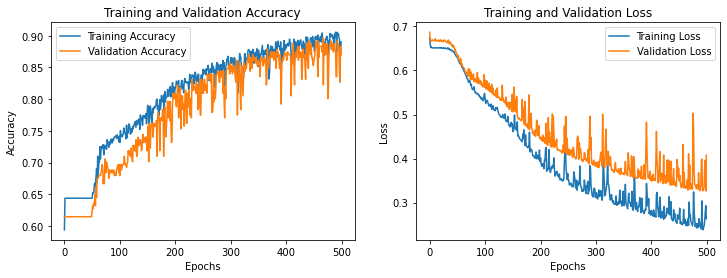

In [69]:
# Plot accuracy and loss curves
def plot_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 4))
    
    # Plotting accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_history(history)

In [ ]:
####### HIVE INDEPENDENT PART ##################

In [ ]:
############ KNN ##############

In [68]:
training_shape = training_features_df.shape
validation_shape = validation_features_df.shape

print(f"Training set dimensions: {training_shape[0]} samples, {training_shape[1]} features per sample")
print(f"Validation set dimensions: {validation_shape[0]} samples, {validation_shape[1]} features per sample")

# Add the 'queen_status' column from train_data and validation_data to the feature DataFrames
training_features_df['queen state'] = train_data['queen state'].values
validation_features_df['queen state'] = validation_data['queen state'].values

print("Training Features with Queen State:")
print(training_features_df.head(50))

print("\nValidation Features with Queen State:")
print(validation_features_df.head(50))

training_data = training_features_df
testing_data = validation_features_df

Training set dimensions: 423 samples, 20 features per sample
Validation set dimensions: 444 samples, 20 features per sample
Training Features with Queen State:
                                               0  ...    queen state
2022-06-24--10-03-35_1__segment0.wav -272.670288  ...  Queen Present
2022-06-24--11-03-30_1__segment0.wav -250.750778  ...  Queen Present
2022-06-24--12-02-42_1__segment0.wav -252.060272  ...  Queen Present
2022-06-24--13-01-08_1__segment0.wav -241.995331  ...  Queen Present
2022-06-24--14-00-07_1__segment0.wav -247.006500  ...  Queen Present
2022-06-24--14-59-04_1__segment0.wav -265.118805  ...  Queen Present
2022-06-24--15-58-15_1__segment0.wav -270.901794  ...  Queen Present
2022-06-24--16-57-25_1__segment0.wav -251.522842  ...  Queen Present
2022-06-24--17-56-26_1__segment0.wav -271.229584  ...  Queen Present
2022-06-24--18-55-31_1__segment0.wav -278.139587  ...  Queen Present
2022-06-24--19-54-30_1__segment0.wav -281.593262  ...  Queen Present
2022-06-24--

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\chris\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [       nan 0.74955182 0.76358543 0.76358543        nan 0.74005602
 0.74943978 0.75411765        nan 0.7564986  0.7659944  0.76834734
        nan 0.77308123 0.76607843 0.76840336 0.74719888 0.74955182
 0.76358543 0.76358543 0.74005602 0.74005602 0.74943978 0.75411765
 0.75414566 0.7564986  0.7659944  0.76834734 0.76602241 0.77308123
 0.76607843 0.76840336]
  warnings.warn(


Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

Classification Report - Test Set:
                              precision    recall  f1-score   support

                    No Queen       0.00      0.00      0.00        53
Queen Being Introduced (Bad)       0.00      0.00      0.00        72
               Queen Present       0.71      0.96      0.81       319

                    accuracy                           0.69       444
                   macro avg       0.24      0.32      0.27       444
                weighted avg       0.51      0.69      0.59       444



C:\Users\chris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


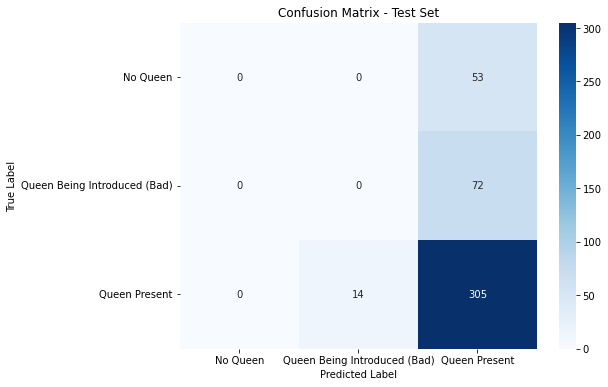

In [70]:
X_train = training_data.iloc[:, :-2].values  # Extract all columns except the last two as features
y_train = training_data.iloc[:, -1].values   # Extract the last column ('queen state') as the target

X_test = testing_data.iloc[:, :-2].values    # Extract all columns except the last two as features
y_test = testing_data.iloc[:, -1].values     # Extract the last column ('queen state') as the target

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],        # Number of neighbors to try
    'weights': ['uniform', 'distance'], # Weighting function
    'p': [1, 2],                        # Manhattan distance (p=1) and Euclidean distance (p=2)
    'algorithm': ['auto', 'kd_tree'],   # Algorithm to use
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_knn = grid_search.best_estimator_

print(f"Best Parameters: {grid_search.best_params_}")

y_test_pred = best_knn.predict(X_test_scaled)

#Evaluate the model
# Classification report
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred, target_names=['No Queen', 'Queen Being Introduced (Bad)', 'Queen Present']))

# Step 8: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Queen', 'Queen Being Introduced (Bad)', 'Queen Present'], 
            yticklabels=['No Queen', 'Queen Being Introduced (Bad)', 'Queen Present'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [ ]:
######## LASSO LOGISTIC ###############

In [76]:
# Add the 'queen_status' column from train_data and validation_data to the feature DataFrames
training_features_df['queen status'] = train_data['queen status'].values
validation_features_df['queen status'] = validation_data['queen status'].values

print("Training Features with Queen State:")
print(training_features_df.head(50))

print("\nValidation Features with Queen State:")
print(validation_features_df.head(50))

Training Features with Queen State:
                                               0  ...  queen status
2022-06-24--10-03-35_1__segment0.wav -272.670288  ...             1
2022-06-24--11-03-30_1__segment0.wav -250.750778  ...             1
2022-06-24--12-02-42_1__segment0.wav -252.060272  ...             1
2022-06-24--13-01-08_1__segment0.wav -241.995331  ...             1
2022-06-24--14-00-07_1__segment0.wav -247.006500  ...             1
2022-06-24--14-59-04_1__segment0.wav -265.118805  ...             1
2022-06-24--15-58-15_1__segment0.wav -270.901794  ...             1
2022-06-24--16-57-25_1__segment0.wav -251.522842  ...             1
2022-06-24--17-56-26_1__segment0.wav -271.229584  ...             1
2022-06-24--18-55-31_1__segment0.wav -278.139587  ...             1
2022-06-24--19-54-30_1__segment0.wav -281.593262  ...             1
2022-06-24--20-53-33_1__segment0.wav -283.865479  ...             1
2022-06-24--21-52-38_1__segment0.wav -284.184174  ...             1
2022-06-24--

Best alpha for Lasso: 0.010985411419875584


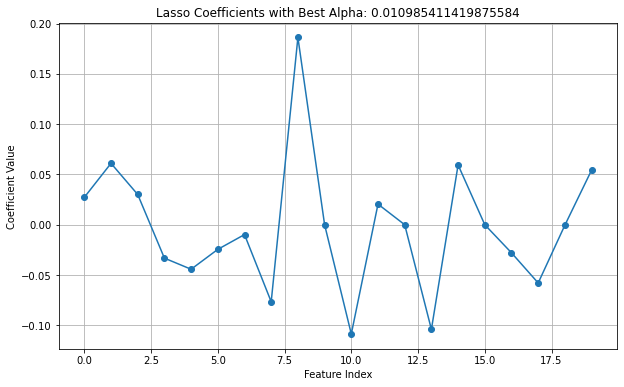

Selected Features (indices): [ 0  1  2  3  4  5  6  7  8 10 11 13 14 16 17 18 19]
Best parameters for Logistic Regression: {'C': 11.288378916846883, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'saga'}

Classification Report - Test Set:
              precision    recall  f1-score   support

  Absent (0)       0.33      0.02      0.04       125
 Present (1)       0.72      0.98      0.83       319

    accuracy                           0.71       444
   macro avg       0.53      0.50      0.44       444
weighted avg       0.61      0.71      0.61       444



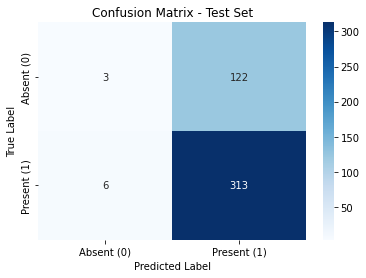

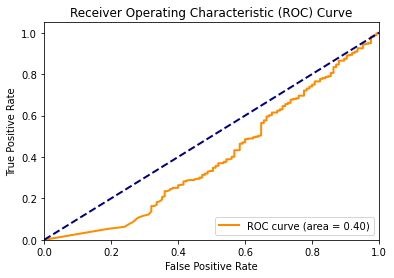


AUC Score: 0.40


In [78]:
X_train = training_data.iloc[:, :-2].values  
y_train = training_data.iloc[:, -1].values   # Extract the target ('queen_status')

X_test = testing_data.iloc[:, :-2].values 
y_test = testing_data.iloc[:, -1].values     # Extract the target ('queen_status')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_params = {'alpha': np.logspace(-4, 0, 50)}  # Range of alphas for Lasso regularization

# Step 4: Apply Grid Search CV for Lasso
lasso = Lasso(max_iter=10000, random_state=42)
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, n_jobs=-1)
lasso_cv.fit(X_train_scaled, y_train)

# Best Lasso model
best_lasso = lasso_cv.best_estimator_
print(f"Best alpha for Lasso: {lasso_cv.best_params_['alpha']}")

plt.figure(figsize=(10, 6))
plt.plot(range(len(best_lasso.coef_)), best_lasso.coef_, marker='o')
plt.title(f"Lasso Coefficients with Best Alpha: {lasso_cv.best_params_['alpha']}")
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

selected_features = np.where(best_lasso.coef_ != 0)[0]
print(f"Selected Features (indices): {selected_features}")

X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

log_reg_params = {
    'penalty': ['l1'],
    'C': np.logspace(-4, 4, 20),  # Regularization parameter range
    'solver': ['saga'],           # Solver for L1 penalty
    'max_iter': [5000]
}

log_reg_model = LogisticRegression(random_state=42)
log_reg_cv = GridSearchCV(log_reg_model, log_reg_params, cv=5, n_jobs=-1)
log_reg_cv.fit(X_train_selected, y_train)

#  Logistic Regression model
best_log_reg = log_reg_cv.best_estimator_
print(f"Best parameters for Logistic Regression: {log_reg_cv.best_params_}")

#Predict
y_test_pred = best_log_reg.predict(X_test_selected)

# Evaluate the model
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred, target_names=['Absent (0)', 'Present (1)']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Absent (0)', 'Present (1)'], yticklabels=['Absent (0)', 'Present (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Step 12: ROC curve and AUC score
y_prob = best_log_reg.predict_proba(X_test_selected)[:, 1]  

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Step 13: Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Step 14: Print AUC score
print(f"\nAUC Score: {roc_auc:.2f}")


In [ ]:
############# NORMAL LOGISTIC ######################

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\chris\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chris\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\chris\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver

Best Parameters: {'C': 10, 'l1_ratio': 0, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Training Accuracy: 0.9196
Test Accuracy: 0.7027


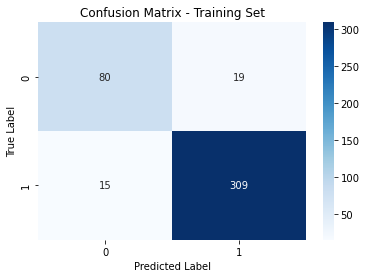

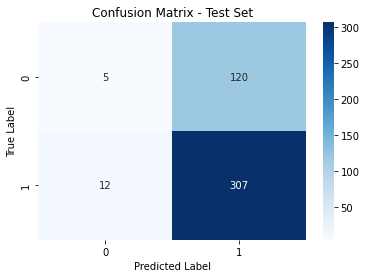


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.29      0.04      0.07       125
           1       0.72      0.96      0.82       319

    accuracy                           0.70       444
   macro avg       0.51      0.50      0.45       444
weighted avg       0.60      0.70      0.61       444



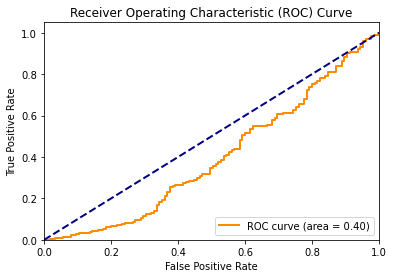


AUC Score: 0.40


In [74]:
training_data = training_features_df
testing_data = validation_features_df


X_train = training_data.iloc[:, :-2].values  # Extract first columns as features (coefficients)
y_train = training_data.iloc[:, -1].values   # Extract the last column ('queen_status') as the target

X_test = testing_data.iloc[:, :-2].values    # Extract first columns as features (coefficients)
y_test = testing_data.iloc[:, -1].values     # Extract the last column ('queen_status') as the target


log_reg_model = LogisticRegression(random_state=42)


param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Penalty types
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Solvers that support different penalties
    'max_iter': [100, 200, 500],  # Maximum number of iterations
    'l1_ratio': [0, 0.5, 1]  # Only used with elasticnet
}

grid_search = GridSearchCV(log_reg_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Predict training data
y_train_pred = best_model.predict(X_train)

# Predict on the test data
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate the model on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Training Set')
plt.show()

# confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

#  classification report for the test set
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred, target_names=['0', '1']))

#  ROC curve and AUC 
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class (Present)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC Score: {roc_auc:.2f}")


In [ ]:
############### SVM ##################

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


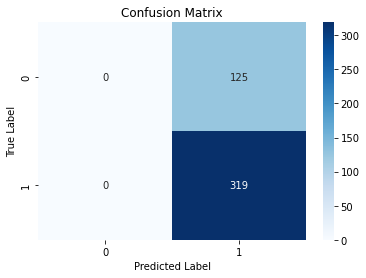


Test Set Mean Squared Error: 0.28153153153153154


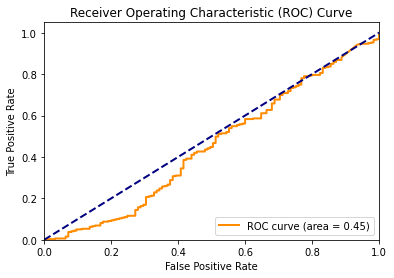


AUC Score: 0.45


In [101]:
training_data = training_features_df
testing_data = validation_features_df
 
X_train = training_data.iloc[:, :-2].values  
y_train = training_data.iloc[:, -2].values   
 
X_test = testing_data.iloc[:, :-2].values   
y_test = testing_data.iloc[:, -2].values     

svm_model = SVC(probability=True)
 
param_grid = {
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'gamma': ['scale', 0.1, 0.01, 0.001], # Kernel coefficient for 'rbf'
    'kernel': ['rbf', 'linear']           # Try both RBF and Linear kernels
}
 
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, scoring='accuracy')
 
# : Fit  SVM model on training data using GridSearchCV
grid_search.fit(X_train, y_train)
 
# best hyperparameters and the best accuracy score
print(f"\nBest Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")
 
#  Evaluate the best model on test data
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)
 
#classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['0', '1']))
 
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
 
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
 
#mse on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"\nTest Set Mean Squared Error: {mse}")

# ROC curve and AUC score
y_prob = best_svm_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class (Present)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"\nAUC Score: {roc_auc:.2f}")

In [ ]:
############# CNN ################

C:\Users\chris\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.3702 - loss: 0.8167 - val_accuracy: 0.7185 - val_loss: 0.6045
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7650 - loss: 0.5649 - val_accuracy: 0.7185 - val_loss: 0.6009
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7689 - loss: 0.5417 - val_accuracy: 0.7185 - val_loss: 0.6181
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7793 - loss: 0.5320 - val_accuracy: 0.7185 - val_loss: 0.6255
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7749 - loss: 0.5401 - val_accuracy: 0.7185 - val_loss: 0.6251
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7730 - loss: 0.5419 - val_accuracy: 0.7185 - val_loss: 0.6190
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7658 - loss: 0.5497 - val_accuracy: 0.7185 - val_loss: 0.6112
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7861 - loss: 0.5184 - val_accuracy: 0.7185 - val_loss:

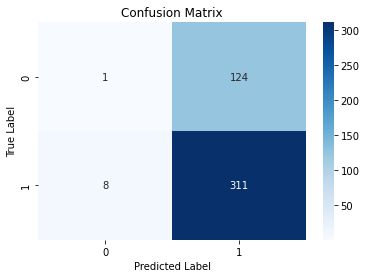

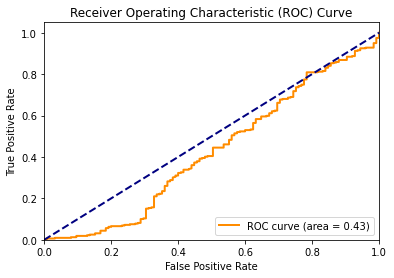

In [103]:
training_data = training_features_df
testing_data = validation_features_df

X_train = training_data.iloc[:, :-2].values  
y_train = training_data.iloc[:, -2].values   

X_test = testing_data.iloc[:, :-2].values   
y_test = testing_data.iloc[:, -2].values   

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN input (3D input with 1 channel)
# Shape will be (samples, 20 features, 1 channel, 1)
X_train_reshaped = X_train_scaled.reshape(-1, 20, 1, 1)  
X_test_reshaped = X_test_scaled.reshape(-1, 20, 1, 1)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the CNN model with specified parameters
def create_cnn():
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size=(8, 8), activation='sigmoid', input_shape=(20, 1, 1), padding='same'))
    
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
    
    model.add(Flatten())
    
    model.add(Dense(256, activation='sigmoid'))
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(64, activation='sigmoid'))
    
    model.add(Dense(1, activation='sigmoid')) 
    
    model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

#Create the CNN model
model = create_cnn()

#Train the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=500, batch_size=128, validation_data=(X_test_reshaped, y_test_encoded))

#Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print(f"Test Accuracy: {test_accuracy}")

# predictions
y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba >= 0.5).astype(int).flatten()

#classification metrics
print(classification_report(y_test_encoded, y_pred))
print(f"Confusion Matrix:\n{confusion_matrix(y_test_encoded, y_pred)}")
print(f"AUC Score: {roc_auc_score(y_test_encoded, y_pred_proba)}")

#  Confusion Matrix and ROC Curve
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

def plot_custom_roc(y_test_encoded, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba)
    roc_auc = auc(fpr, tpr)  # Compute AUC
    
    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    
    # Plot diagonal line 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
    
    # plot limits and labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    
    #  legend in lower right corner
    plt.legend(loc="lower right")
    

    plt.show()

# Call the custom ROC plotting function
plot_custom_roc(y_test_encoded, y_pred_proba)

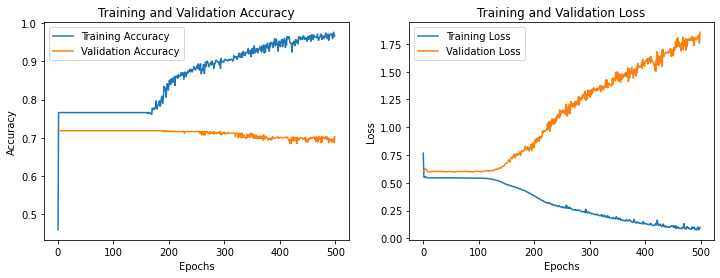

In [105]:
# Plot accuracy and loss curves
def plot_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 4))
    
    # Plotting accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Call the plot_history function to plot accuracy and loss curves
plot_history(history)